# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | palikir - national government center
Processing Record 2 of Set 1 | port blair
Processing Record 3 of Set 1 | kapa'a
Processing Record 4 of Set 1 | santa luzia
Processing Record 5 of Set 1 | fortuna
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | maquoketa
Processing Record 13 of Set 1 | marsa alam
Processing Record 14 of Set 1 | namsos
Processing Record 15 of Set 1 | stanley
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | freetown
Processing Record 19 of Set 1 | labrador city
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | georgetown
Proce

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,palikir - national government center,6.9248,158.1611,25.41,94,100,1.03,FM,1718290900
1,port blair,11.6667,92.7500,29.02,84,40,4.63,IN,1718290900
2,kapa'a,22.0752,-159.3190,21.77,77,1,4.35,US,1718290900
3,santa luzia,-19.7697,-43.8514,23.76,51,0,3.60,BR,1718290900
4,fortuna,40.5982,-124.1573,11.19,91,100,3.09,US,1718290636


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,palikir - national government center,6.9248,158.1611,25.41,94,100,1.03,FM,1718290900
1,port blair,11.6667,92.7500,29.02,84,40,4.63,IN,1718290900
2,kapa'a,22.0752,-159.3190,21.77,77,1,4.35,US,1718290900
3,santa luzia,-19.7697,-43.8514,23.76,51,0,3.60,BR,1718290900
4,fortuna,40.5982,-124.1573,11.19,91,100,3.09,US,1718290636


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

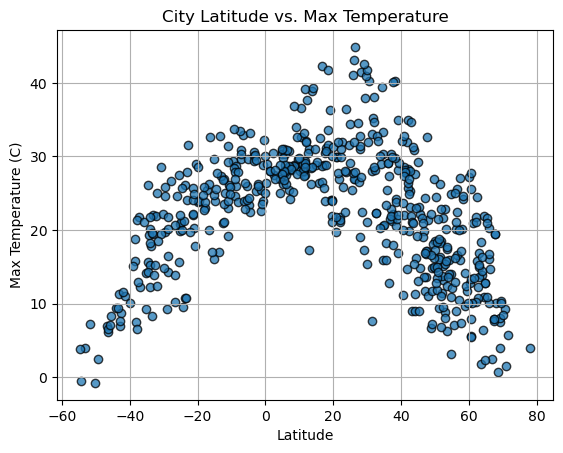

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

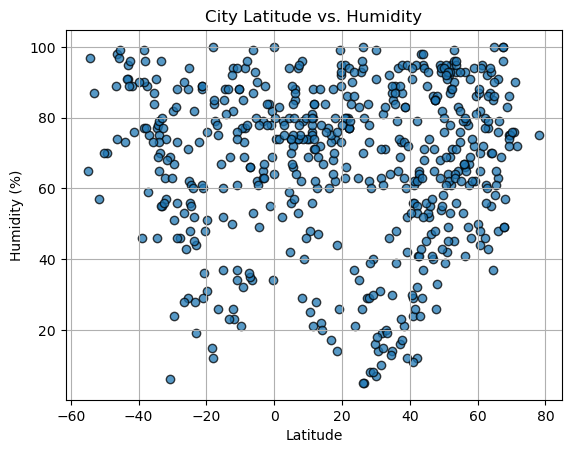

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

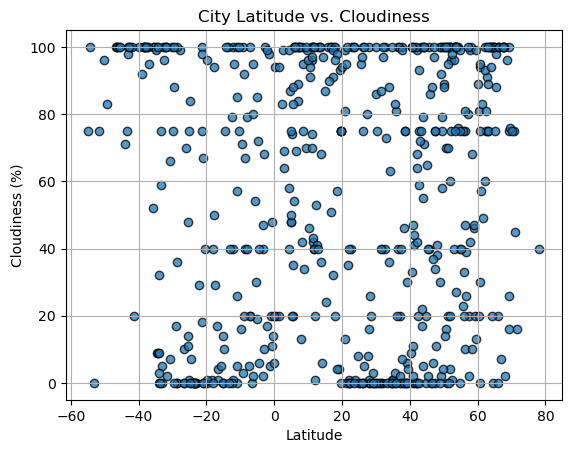

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

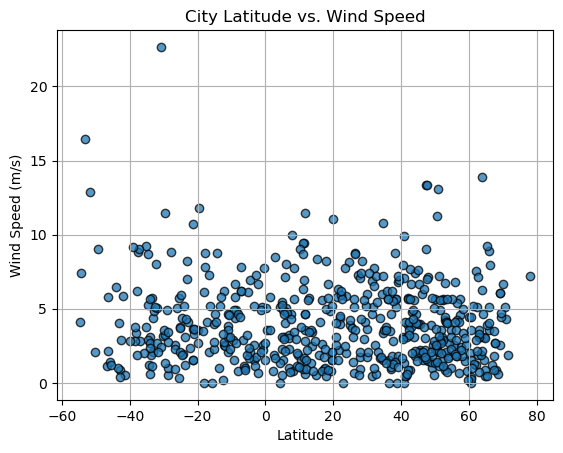

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black', alpha=0.75)


# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, hemisphere, title, xlabel, ylabel, output_path):
    """
    Creates a scatter plot with linear regression line, formula, and r-value.
    
    Parameters:
    - x_values: Series or list of x-axis values (e.g., Latitude)
    - y_values: Series or list of y-axis values (e.g., Temperature)
    - hemisphere: String indicating the hemisphere (e.g., 'Northern Hemisphere')
    - title: Title of the plot
    - xlabel: Label for the x-axis
    - ylabel: Label for the y-axis
    - output_path: Path to save the plot
    """

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head() 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,palikir - national government center,6.9248,158.1611,25.41,94,100,1.03,FM,1718290900
1,port blair,11.6667,92.7500,29.02,84,40,4.63,IN,1718290900
2,kapa'a,22.0752,-159.3190,21.77,77,1,4.35,US,1718290900
4,fortuna,40.5982,-124.1573,11.19,91,100,3.09,US,1718290636
5,iqaluit,63.7506,-68.5145,1.85,87,100,3.09,CA,1718290815


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,santa luzia,-19.7697,-43.8514,23.76,51,0,3.60,BR,1718290900
8,port elizabeth,-33.9180,25.5701,20.16,65,0,3.09,ZA,1718290900
9,adamstown,-25.0660,-130.1015,19.83,62,1,3.80,PN,1718290900
15,punta arenas,-53.1500,-70.9167,4.01,87,0,16.46,CL,1718290801
18,blackmans bay,-43.0167,147.3167,6.96,91,100,0.89,AU,1718290901


###  Temperature vs. Latitude Linear Regression Plot

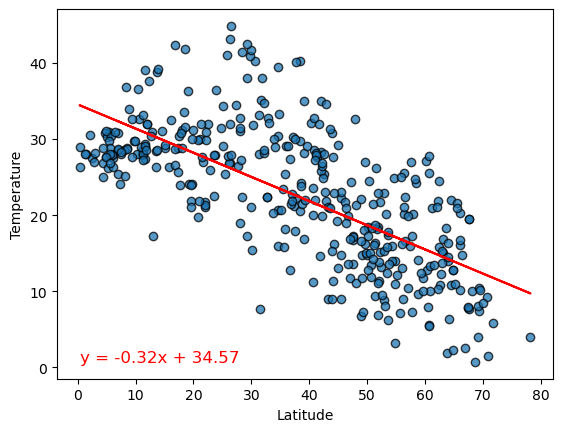

The r-value is: -0.693255622905024


In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

plt.scatter(x_values, y_values, edgecolor='black', alpha=0.75)
plt.plot(x_values, regress_values, 'r')

plt.xlabel('Latitude') 
plt.ylabel('Temperature') 
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color='red')
plt.show()

print(f'The r-value is: {r_value}')


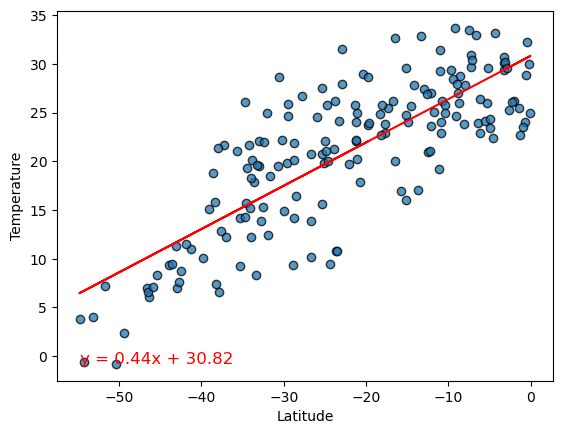

The r-value is: 0.801190767641613


In [16]:
# Linear regression on Southern Hemisphere


x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

plt.scatter(x_values, y_values, edgecolor='black', alpha=0.75)
plt.plot(x_values, regress_values, 'r')

plt.xlabel('Latitude') 
plt.ylabel('Temperature') 

plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color='red')
plt.show()

print(f'The r-value is: {r_value}')

**Discussion about the linear relationship:** 

As we can see from the r-value of -0.69, it indicates that as the temperature decreases in the Northern Hemisphere, the latitude increases. However, in the Southern Hemisphere, the r-value of 0.80 shows a completely opposite result: as the temperature increases, the latitude decreases

### Humidity vs. Latitude Linear Regression Plot

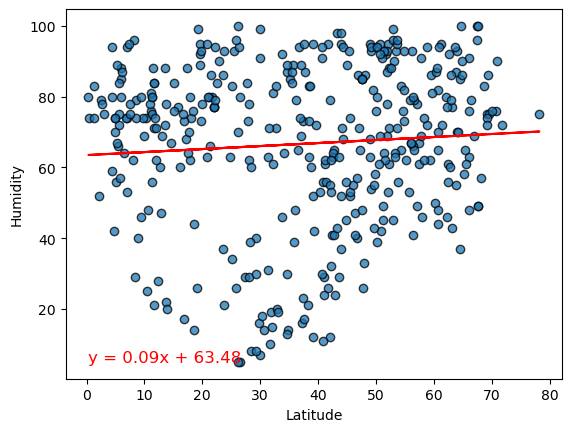

The r-value is: 0.07242304119973869


In [17]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

plt.scatter(x_values, y_values, edgecolor='black', alpha=0.75)
plt.plot(x_values, regress_values, 'r')

plt.xlabel('Latitude') 
plt.ylabel('Humidity') 
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color='red')
plt.show()




print(f'The r-value is: {r_value}')

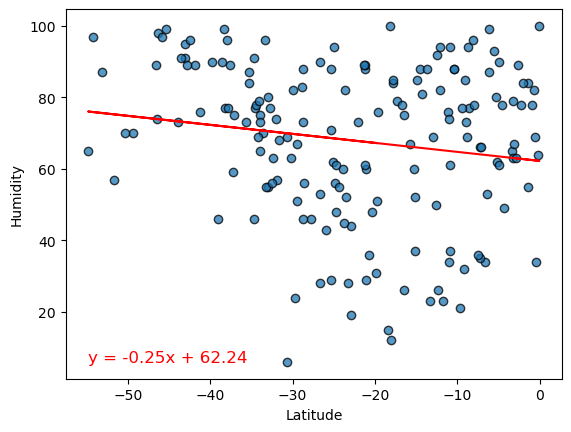

The r-value is: -0.16065805139094266


In [19]:
# Southern Hemisphere
# YOUR CODE HERE


x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

plt.scatter(x_values, y_values, edgecolor='black', alpha=0.75)
plt.plot(x_values, regress_values, 'r')

plt.xlabel('Latitude') 
plt.ylabel('Humidity') 
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color='red')
plt.show()

print(f'The r-value is: {r_value}')

**Discussion about the linear relationship:** 

In the Northern Hemisphere, the r-value of 0.07 indicates a slight increase in latitude as humidity levels rise. Conversely, in the Southern Hemisphere, there is a slight tendency for latitude to decrease as humidity increases.


### Cloudiness vs. Latitude Linear Regression Plot

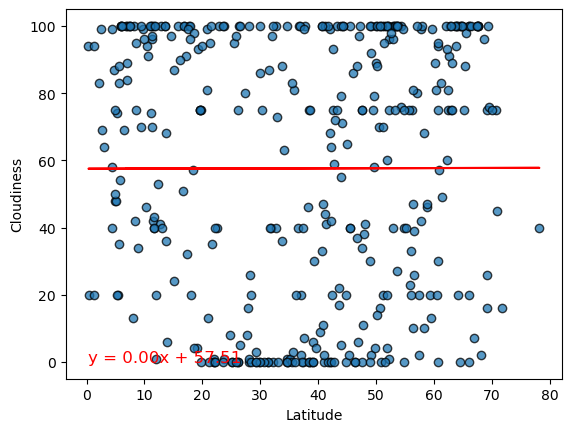

The r-value is: 0.001627887128828967


In [20]:
# Northern Hemisphere


x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

plt.scatter(x_values, y_values, edgecolor='black', alpha=0.75)
plt.plot(x_values, regress_values, 'r')

plt.xlabel('Latitude') 
plt.ylabel('Cloudiness') 
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color='red')
plt.show()

print(f'The r-value is: {r_value}')

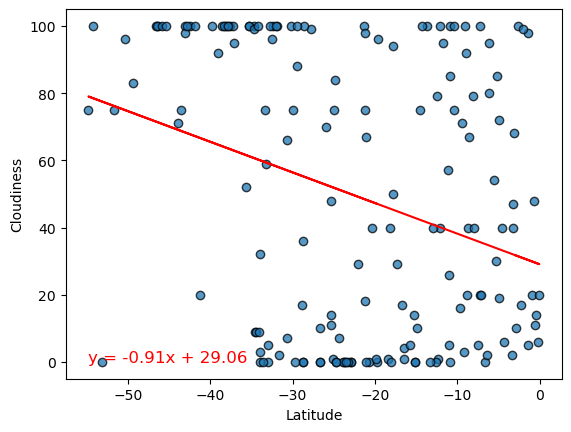

The r-value is: -0.3080895959069384


In [21]:
# Southern Hemisphere


x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

plt.scatter(x_values, y_values, edgecolor='black', alpha=0.75)
plt.plot(x_values, regress_values, 'r')

plt.xlabel('Latitude') 
plt.ylabel('Cloudiness') 
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color='red')
plt.show()

print(f'The r-value is: {r_value}')

**Discussion about the linear relationship:** 
Northern Hemisphere: The r-value is 0.001, indicating that as cloudiness increases, latitude also tends to increase very slighly.

Southern Hemisphere: The r-value is -0.308, showing an opposite trend, the change is significant. 

### Wind Speed vs. Latitude Linear Regression Plot

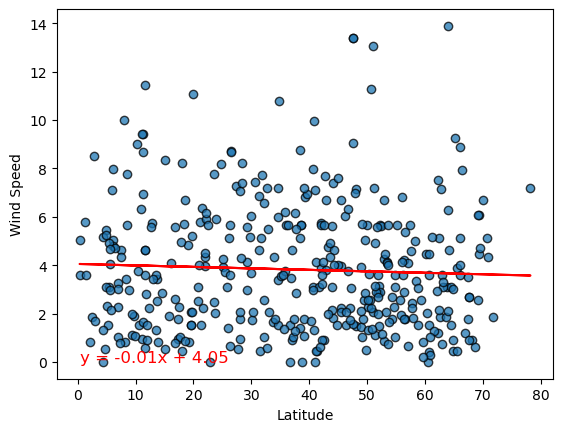

The r-value is: -0.04622466568676217


In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

plt.scatter(x_values, y_values, edgecolor='black', alpha=0.75)
plt.plot(x_values, regress_values, 'r')

plt.xlabel('Latitude') 
plt.ylabel('Wind Speed') 
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color='red')
plt.show()

print(f'The r-value is: {r_value}')


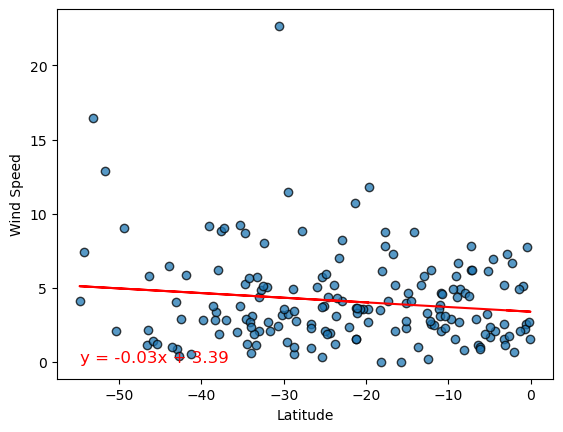

The r-value is: -0.14234444633721716


In [23]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

plt.scatter(x_values, y_values, edgecolor='black', alpha=0.75)
plt.plot(x_values, regress_values, 'r')

plt.xlabel('Latitude') 
plt.ylabel('Wind Speed') 
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color='red')
plt.show()

print(f'The r-value is: {r_value}')

**Discussion about the linear relationship:** 


Northern Hemisphere: The r-value is -0.046, indicating a slight negative correlation where as wind speed increases, latitude tends to decrease.

Southern Hemisphere: The r-value is -0.142, showing a similar negative correlation, albeit with a slightly stronger tendency for latitude to decrease as wind speed increases.